In [13]:
!pip install segmentation-models-pytorch

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
#Importing Libraries
import cv2
import numpy as np
import torch
from skimage.io import imread
import os
from torch.cuda import is_available
import matplotlib.pyplot as plt

Crop


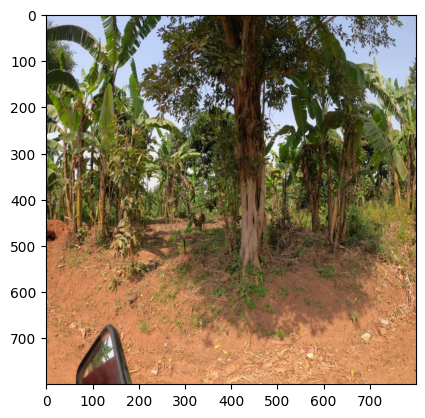

In [16]:
model=torch.load("/content/drive/Shareddrives/Street2Sat_Updates/Models/QAQC_new_squeezeNet1_1/best_model.pth")
device = ("cuda" if torch.cuda.is_available() else "cpu")

def preprocessQAQC(image):
  image= cv2.resize(image,(300,300))/255
  return image.transpose(2,0,1).astype('float32')

CLASSES=['crop','not_Crop']

image=plt.imread("/content/drive/Shareddrives/Street2Sat_Updates/CropOrNop/test/crop/G0011604_JPG_jpg.rf.08477a4917d135d7a0bd8db903c17ef0.jpg")
plt.imshow(image)
image=preprocessQAQC(image)
image=torch.from_numpy(image).float().to(device)
output=model(image.unsqueeze(0))
if output<=0:
  print("Crop")
else:
  print("Nop")



Crop Segmentation

In [17]:
# Defining Constants
DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
MODEL_PATH = "/content/drive/Shareddrives/Street2Sat_Updates/Models/exp4_noWeights_xception/best_model.pth"
IMG_PATH = "/content/drive/Shareddrives/Street2Sat_Updates/CropOrNop/test/crop/G0011311_JPG_jpg.rf.8761bced10ac058e95528f7c17b8d9da.jpg"
CLASSES = ["background", "banana", "maize", "rice", "soybean", "sugarcane", "sunflower", "tobacco", "wheat"]

In [18]:
# Helper Functions
def preprocess(img):
  img = img.astype(float)
  img = (255 * (img - np.min(img[:])) / (np.max(img[:]) - np.min(img[:]) + 0.1)).astype(float)
  img = (img + 0.5) / 256
  gamma = -1/np.nanmean(np.log(img))
  img = img**(gamma)
  img = img.transpose(2, 0, 1).astype('float32')
  return img

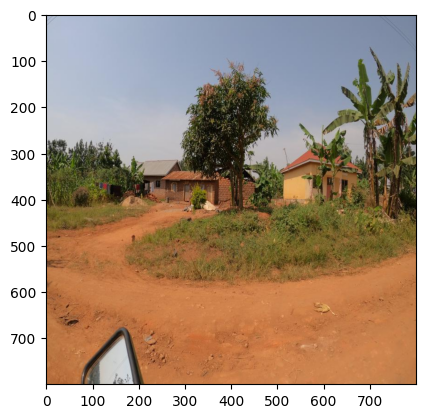

In [19]:
# Initializing Model
model = torch.load(MODEL_PATH)

# Preparing Image
img = imread(IMG_PATH)
plt.imshow(img)
input = preprocess(img)
input = torch.from_numpy(input).unsqueeze(0).to(DEVICE)

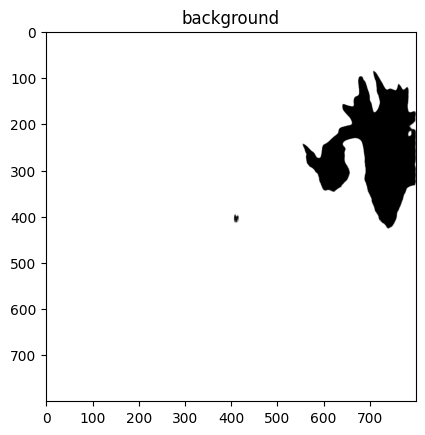

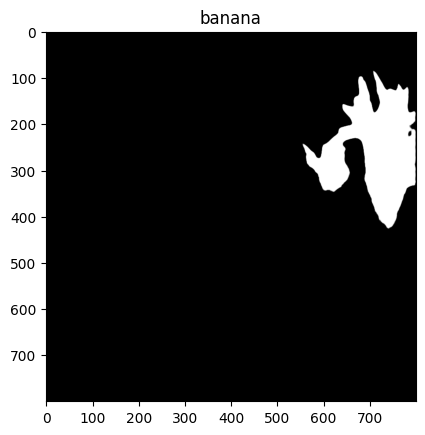

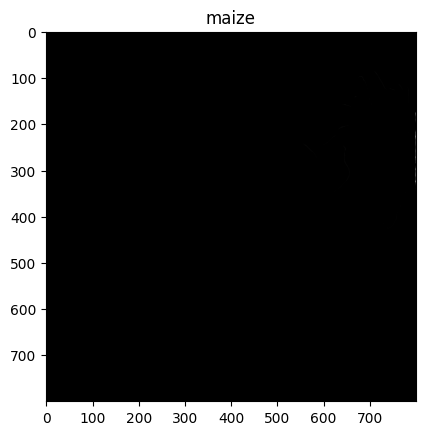

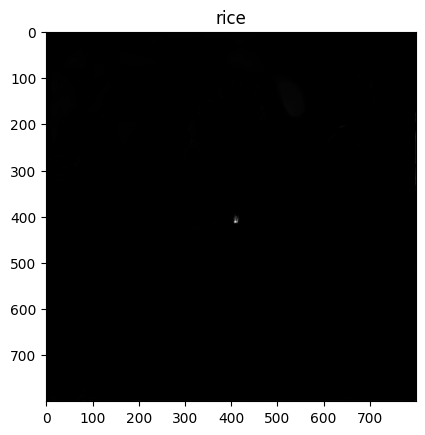

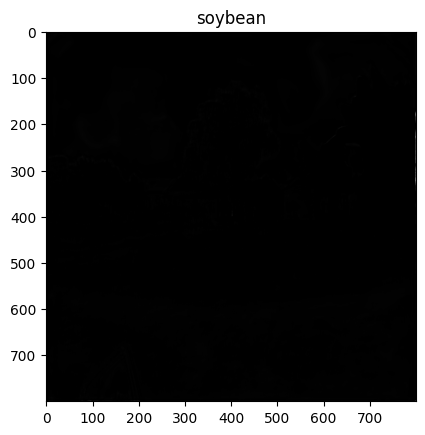

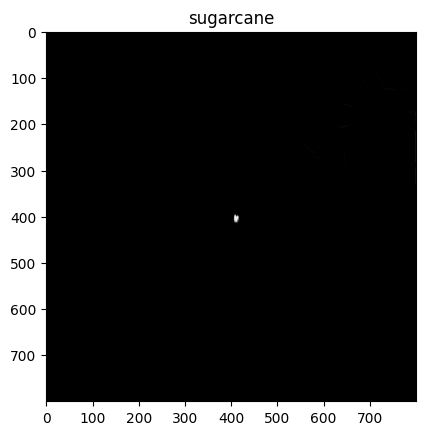

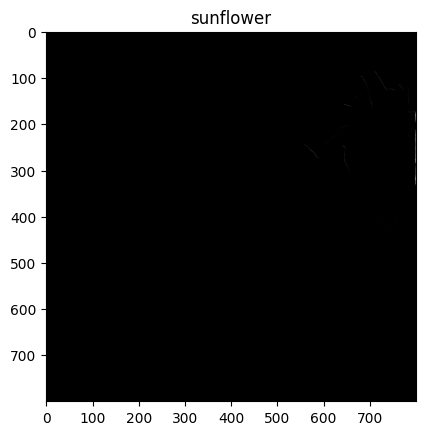

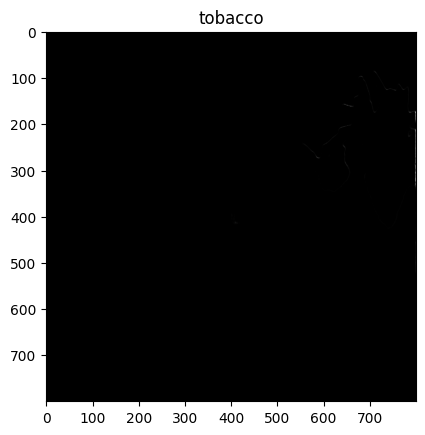

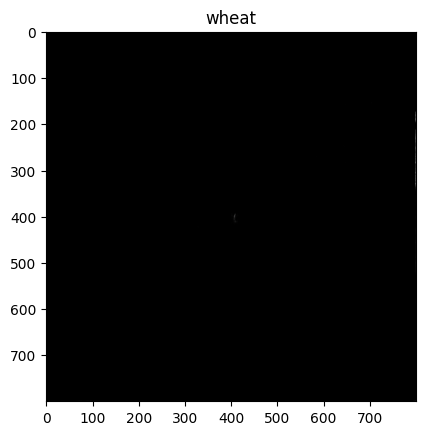

In [20]:
# Predict
out = model(input)[0].cpu().detach().numpy()

# Display results
for i in range(len(CLASSES)):
  plt.title(CLASSES[i])
  plt.imshow(out[i],cmap="gray")
  plt.show()